In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib
import xgboost as xgb
import catboost

In [7]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)
print(sklearn.__version__)
print(matplotlib.__version__)
print(xgb.__version__)
print(catboost.__version__)

1.3.4
1.26.1
0.11.2
0.24.2
3.4.3
1.5.1
1.1.1


In [2]:
df1 = pd.read_csv('Copy of archive(1)/urldata.csv', index_col=0)
df1.head()

,url,label,result
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0


In [3]:
df1.result[df1['label']=='benign'].unique()

array([0], dtype=int64)

In [4]:
df1.label[df1['result']==1].unique()

array(['malicious'], dtype=object)

In [5]:
df2 = pd.read_csv('Copy of archive(2)/data.csv')
df2.head()

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad


In [6]:
df2['label'].unique()

array(['bad', 'good'], dtype=object)

In [7]:
df3 = pd.read_csv('Copy of archive(3)/phishing_site_urls.csv')
df3.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [8]:
df4 = pd.read_csv('Copy of archive(4)/malicious_phish.csv')
df4.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [9]:
df4['type'].unique()

array(['phishing', 'benign', 'defacement', 'malware'], dtype=object)

In [10]:
df4.shape

(651191, 2)

In [11]:
df3.shape

(549346, 2)

In [12]:
df2.shape

(420464, 2)

In [13]:
df1.shape

(450176, 3)

In [14]:
df1.head()

,url,label,result
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0


In [15]:
def PreProcessing(df):
    feature = {'url_length':[], 
            'WWW Present':[], 
            'Digit to Alphabet ratio':[],  
            'Uppercase to LowercaseRatio':[], 
            'Dots':[], 
            'Semicolon':[],
            'Underscore':[], 
            'Question Mark':[], 
            'Exclamation Mark':[],
            'Hash Character':[], 
            'Equals':[], 
            'Percentage Character':[], 
            'Ampersand':[], 
            'Dash':[], 
            'Double Slash':[], 
            'Https in URL':[]}

    for url in df['url']:
        
        feature['url_length'].append(len(url))
        
        if 'www' in url.lower():
            feature['WWW Present'].append(1)
        else:
            feature['WWW Present'].append(0)
        
        if 'https' in url.lower():
            feature['Https in URL'].append(1)
        else:
            feature['Https in URL'].append(0)
        
        feature['Dots'].append(url.count('.'))
        feature['Semicolon'].append(url.count(';'))
        feature['Underscore'].append(url.count('_'))
        feature['Question Mark'].append(url.count('?'))
        feature['Exclamation Mark'].append(url.count('!'))
        feature['Hash Character'].append(url.count('#'))
        feature['Equals'].append(url.count('='))
        feature['Percentage Character'].append(url.count('%'))
        feature['Ampersand'].append(url.count('&'))
        feature['Dash'].append(url.count('-'))
        feature['Double Slash'].append(url.count('//'))

        alpha = 0
        num = 0
        upper = 0
        lower = 0
        
        for i in url:
            if i.isalpha():
                alpha += 1
            if i.isnumeric():
                num += 1
            if i.isupper():
                upper += 1
            if i.islower():
                lower += 1
            
        feature['Digit to Alphabet ratio'].append(num/alpha)
        feature['Uppercase to LowercaseRatio'].append(upper/lower)
        
    new_df = pd.DataFrame(feature)
        
    df = pd.concat([df, new_df], axis=1)
        
    return df

In [16]:
df1 = PreProcessing(df1)
df1.head()

,url,label,result,url_length,WWW Present,Digit to Alphabet ratio,Uppercase to LowercaseRatio,Dots,Semicolon,Underscore,Question Mark,Exclamation Mark,Hash Character,Equals,Percentage Character,Ampersand,Dash,Double Slash,Https in URL
0,https://www.google.com,benign,0,22,1,0.0,0.0,2,0,0,0,0,0,0,0,0,0,1,1
1,https://www.youtube.com,benign,0,23,1,0.0,0.0,2,0,0,0,0,0,0,0,0,0,1,1
2,https://www.facebook.com,benign,0,24,1,0.0,0.0,2,0,0,0,0,0,0,0,0,0,1,1
3,https://www.baidu.com,benign,0,21,1,0.0,0.0,2,0,0,0,0,0,0,0,0,0,1,1
4,https://www.wikipedia.org,benign,0,25,1,0.0,0.0,2,0,0,0,0,0,0,0,0,0,1,1


In [17]:
df1.tail(30)

,url,label,result,url_length,WWW Present,Digit to Alphabet ratio,Uppercase to LowercaseRatio,Dots,Semicolon,Underscore,Question Mark,Exclamation Mark,Hash Character,Equals,Percentage Character,Ampersand,Dash,Double Slash,Https in URL
450146,http://leentra1.com/ST/SOS,malicious,1,26,0,0.052632,0.357143,1,0,0,0,0,0,0,0,0,0,1,0
450147,http://nb84.servidoraweb.net/load/dropbox2016/...,malicious,1,60,0,0.136364,0.023256,3,0,0,0,0,0,0,0,0,0,1,0
450148,http://www.yourbusinesswebapp.com/wp-content/t...,malicious,1,77,1,0.000000,0.000000,3,0,0,0,0,0,0,0,0,1,1,0
450149,http://draywalejohn.com/Google/,malicious,1,31,0,0.000000,0.041667,1,0,0,0,0,0,0,0,0,0,1,0
450150,http://www.sadhakayogaiyengar.com/wp-includes/...,malicious,1,69,1,0.000000,0.035714,3,0,0,0,0,0,0,0,0,1,1,0
450151,http://gaptrade.cl/file/bless/index.php?email=,malicious,1,46,0,0.000000,0.000000,2,0,0,1,0,0,1,0,0,0,1,0
450152,http://gospelchurchofchrist.org/best_update/pr...,malicious,1,63,0,0.000000,0.000000,2,0,1,0,0,0,0,0,0,0,1,0
450153,http://thepizzaplacesandimas.com/includes/book...,malicious,1,272,0,0.382716,0.038462,14,10,0,2,0,0,6,0,10,0,1,0
450154,http://ui3china.com/still/G.Docs/index.php,malicious,1,42,0,0.031250,0.066667,3,0,0,0,0,0,0,0,0,0,1,0
450155,http://ui3china.com/live/G.Docs/index.php,malicious,1,41,0,0.032258,0.068966,3,0,0,0,0,0,0,0,0,0,1,0


In [18]:
df1['Dots'].unique()

array([ 2,  3,  4,  5,  6,  7, 11, 10,  9, 13, 14, 16, 12, 18,  8, 15, 19,
       28, 22,  1, 17, 25, 26, 21, 27, 30, 24, 20, 23, 29,  0, 32],
      dtype=int64)

In [19]:
df1.describe()

,result,url_length,WWW Present,Digit to Alphabet ratio,Uppercase to LowercaseRatio,Dots,Semicolon,Underscore,Question Mark,Exclamation Mark,Hash Character,Equals,Percentage Character,Ampersand,Dash,Double Slash,Https in URL
count,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000
mean,0.231994,60.237849,0.802095,0.092747,0.039481,2.620553,0.047666,0.419527,0.152854,0.001353,0.001297,0.258044,0.090007,0.123265,1.251930,1.004563,0.784207
std,0.422105,37.571613,0.398420,0.211052,0.144652,1.144966,0.568434,1.337560,0.462658,0.055169,0.235577,0.910431,1.166887,0.797066,2.570521,0.079324,0.411372
min,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,40.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,0.000000,52.000000,1.000000,0.018182,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.000000,71.000000,1.000000,0.120690,0.045455,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,2314.000000,1.000000,5.500000,13.250000,32.000000,30.000000,200.000000,166.000000,10.000000,152.000000,34.000000,134.000000,37.000000,42.000000,7.000000,1.000000


In [20]:
y = df1['result']
x = df1.drop(columns=['url', 'label', 'result'])

In [21]:
df1_x = df1.drop(index=x[x.duplicated()].index)
y.drop(index=x[x.duplicated()].index, inplace=True)
x.drop(index=x[x.duplicated()].index, inplace=True)

<AxesSubplot:>

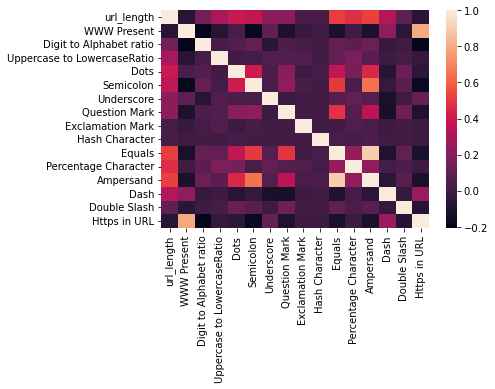

In [22]:
sns.heatmap(x.corr())

In [23]:
x.corr()

,url_length,WWW Present,Digit to Alphabet ratio,Uppercase to LowercaseRatio,Dots,Semicolon,Underscore,Question Mark,Exclamation Mark,Hash Character,Equals,Percentage Character,Ampersand,Dash,Double Slash,Https in URL
url_length,1.000000,-0.075382,0.147311,0.293656,0.390169,0.363812,0.211023,0.215891,0.022465,0.023588,0.511828,0.470731,0.523710,0.325319,0.088822,-0.075696
WWW Present,-0.075382,1.000000,-0.206171,-0.077289,0.025669,-0.178890,0.093320,-0.113691,-0.026077,-0.007692,-0.122458,-0.001065,-0.119910,0.227447,-0.071096,0.792487
Digit to Alphabet ratio,0.147311,-0.206171,1.000000,0.023532,0.053040,0.101449,-0.080851,0.042702,0.014926,0.006359,0.105507,0.083422,0.124135,-0.032886,-0.007523,-0.192699
Uppercase to LowercaseRatio,0.293656,-0.077289,0.023532,1.000000,0.008458,0.012593,0.047721,0.051645,0.047151,0.001372,0.101979,0.166710,0.073258,-0.014747,0.014967,-0.037557
Dots,0.390169,0.025669,0.053040,0.008458,1.000000,0.398297,0.037363,0.208851,-0.009115,0.024302,0.359414,0.156849,0.453375,-0.078185,0.122918,-0.060543
Semicolon,0.363812,-0.178890,0.101449,0.012593,0.398297,1.000000,0.028710,0.231235,0.018315,0.008985,0.505223,0.025619,0.642152,-0.036918,0.075594,-0.169472
Underscore,0.211023,0.093320,-0.080851,0.047721,0.037363,0.028710,1.000000,-0.010083,0.005282,-0.002162,0.062523,0.101988,0.060430,-0.125059,-0.004722,0.104898
Question Mark,0.215891,-0.113691,0.042702,0.051645,0.208851,0.231235,-0.010083,1.000000,0.007361,0.010315,0.484411,0.067055,0.346849,-0.129143,0.132473,-0.111009
Exclamation Mark,0.022465,-0.026077,0.014926,0.047151,-0.009115,0.018315,0.005282,0.007361,1.000000,0.007397,0.009516,0.044557,0.029035,-0.008297,-0.001325,-0.010401
Hash Character,0.023588,-0.007692,0.006359,0.001372,0.024302,0.008985,-0.002162,0.010315,0.007397,1.000000,0.025777,0.011419,0.033789,-0.003529,0.002389,-0.009806


In [12]:
from sklearn.feature_selection import chi2

In [25]:
score, p_value = chi2(x, y)
print(p_value)

[0.00000000e+000 0.00000000e+000 0.00000000e+000 2.00375117e-099
 3.24211538e-117 0.00000000e+000 0.00000000e+000 0.00000000e+000
 7.98704090e-061 2.12604316e-250 0.00000000e+000 5.00146132e-274
 0.00000000e+000 0.00000000e+000 6.50225268e-009 0.00000000e+000]


In [26]:
print(score)

[5.36950516e+04 2.82623608e+04 1.50361820e+03 4.47961077e+02
 5.29724762e+02 3.60988142e+04 8.64154522e+03 4.58422223e+03
 2.70699826e+02 1.14228990e+03 1.09177420e+04 1.25101228e+03
 1.42015757e+04 6.01914282e+04 3.36782841e+01 3.77554938e+04]


In [77]:
lst = list(map(int, df1['Https in URL'][df1['result']==1].values))
lst = np.array(lst)
len(np.where(lst==0)[0])/len(lst)

0.930159520481051

In [79]:
lst = list(map(int, df1['Https in URL'][df1['result']==0].values))
lst = np.array(lst)
len(np.where(lst==1)[0])/len(lst)

0.9999971076364184

In [84]:
lst = list(map(int, df1['WWW Present'][df1['result']==1].values))
lst = np.array(lst)
len(np.where(lst==0)[0])/len(lst)

0.8465213811064938

In [82]:
lst = list(map(int, df1['WWW Present'][df1['result']==0].values))
lst = np.array(lst)
len(np.where(lst==1)[0])/len(lst)

0.9980245156737183

In [130]:
lst = df1['url_length'][df1['result']==1].values
lst = np.array(lst)
print(len(lst[lst<150])/len(lst))
print(len(lst[lst<200])/len(lst))
print(len(lst[lst>150])/len(lst))
print(len(lst[lst>200])/len(lst))
print(len(lst[lst<100])/len(lst))
print(len(lst[lst>100])/len(lst))
print(len(lst[lst<50])/len(lst))
print(len(lst[lst>50])/len(lst))

0.9369673873494322
0.963882877879699
0.06199850629081369
0.03576284494149639
0.8692334207855378
0.12852601543499492
0.49616040138646855
0.4892376338114479


In [122]:
len(lst[lst<150])/len(lst)

0.9369673873494322

In [129]:
lst = df1['url_length'][df1['result']==0].values
lst = np.array(lst)
print(len(lst[lst<150])/len(lst))
print(len(lst[lst<100])/len(lst))
print(len(lst[lst>150])/len(lst))
print(len(lst[lst>100])/len(lst))
print(len(lst[lst<50])/len(lst))
print(len(lst[lst>50])/len(lst))

0.9925058859598888
0.9336781030722686
0.007175954046127414
0.06351051952634654
0.43058905876704323
0.5491210107075299


In [131]:
lst = df1['Digit to Alphabet ratio'][df1['result']==1].values
lst = np.array(lst)
print(len(lst[lst<0.5])/len(lst))
print(len(lst[lst>0.5])/len(lst))

0.9207663877132845
0.0760259675597005


In [132]:
lst = df1['Digit to Alphabet ratio'][df1['result']==0].values
lst = np.array(lst)
print(len(lst[lst<0.5])/len(lst))
print(len(lst[lst>0.5])/len(lst))

0.9903944605452684
0.006987950413318756


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Perceptron

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=47, stratify=y)

In [25]:
print(x_train.shape, x_test.shape, x.shape)

(121462, 16) (30366, 16) (151828, 16)


In [26]:
ss = StandardScaler()
ss.fit(x_test)

x_train = ss.transform(x_train)
x_test = ss.transform(x_test)

In [58]:
model = LogisticRegression()
model.fit(x_train, y_train)

pred = model.predict(x_test)

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score

In [60]:
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred), recall_score(y_test, pred), precision_score(y_test, pred),  f1_score(y_test, pred))

[[20686    64]
 [  116  9500]]
0.99407231772377 0.987936772046589 0.9933082392304475 0.9906152241918665


In [61]:
pred_train = model.predict(x_train)

print(confusion_matrix(y_train, pred_train))
print(accuracy_score(y_train, pred_train), recall_score(y_train, pred_train), precision_score(y_train, pred_train),  f1_score(y_train, pred_train))

[[82731   268]
 [  480 37983]]
0.9938416953450462 0.9875204742219795 0.9929936472249091 0.9902494981359334


In [62]:
percep = Perceptron(random_state=42)
percep.fit(x_train, y_train)

pred_percep = percep.predict(x_test)
print(confusion_matrix(y_test, pred_percep))
print(accuracy_score(y_test, pred_percep), recall_score(y_test, pred_percep), precision_score(y_test, pred_percep),  f1_score(y_test, pred_percep))

[[20578   172]
 [  118  9498]]
0.9904498452216295 0.9877287853577371 0.9822130299896588 0.9849631857305818


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [134]:
model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)

pred2 = model2.predict(x_test)
print(confusion_matrix(y_test, pred2))
print(accuracy_score(y_test, pred2), recall_score(y_test, pred2), precision_score(y_test, pred2),  f1_score(y_test, pred2))

[[20617   133]
 [   98  9518]]
0.9923928077455049 0.9898086522462562 0.9862190446585846 0.9880105880521098


In [135]:
pred_train = model2.predict(x_train)

print(confusion_matrix(y_train, pred_train))
print(accuracy_score(y_train, pred_train), recall_score(y_train, pred_train), precision_score(y_train, pred_train),  f1_score(y_train, pred_train))

[[82999     0]
 [    0 38463]]
1.0 1.0 1.0 1.0


In [87]:
bag_clf = BaggingClassifier(base_estimator=model2, n_estimators=500)
bag_clf.fit(x_train, y_train)

pred_bag = bag_clf.predict(x_test)
print(confusion_matrix(y_test, pred_bag))
print(accuracy_score(y_test, pred_bag), recall_score(y_test, pred_bag), precision_score(y_test, pred_bag),  f1_score(y_test, pred_bag))

[[20701    49]
 [   92  9524]]
0.9953566488836199 0.990432612312812 0.9948814373759532 0.9926520402313825


[Text(453.90993262965804, 803.4088235294117, 'Https in URL <= -0.471\ngini = 0.433\nsamples = 121462\nvalue = [82999, 38463]'),
 Text(453.043697183345, 779.4264705882352, 'gini = 0.0\nsamples = 34814\nvalue = [0, 34814]'),
 Text(454.7761680759711, 779.4264705882352, 'WWW Present <= -0.554\ngini = 0.081\nsamples = 86648\nvalue = [82999, 3649]'),
 Text(115.9905335341203, 755.4441176470588, 'Digit to Alphabet ratio <= -0.706\ngini = 0.125\nsamples = 3196\nvalue = [215, 2981]'),
 Text(67.36334087968952, 731.4617647058824, 'url_length <= -0.63\ngini = 0.336\nsamples = 744\nvalue = [159, 585]'),
 Text(38.121127102199225, 707.4794117647059, 'Uppercase to LowercaseRatio <= -0.226\ngini = 0.465\nsamples = 342\nvalue = [126, 216]'),
 Text(22.58979624838292, 683.4970588235294, 'url_length <= -0.959\ngini = 0.498\nsamples = 216\nvalue = [102, 114]'),
 Text(6.063648124191461, 659.5147058823529, 'Dash <= -0.5\ngini = 0.412\nsamples = 69\nvalue = [49, 20]'),
 Text(4.33117723156533, 635.5323529411764,

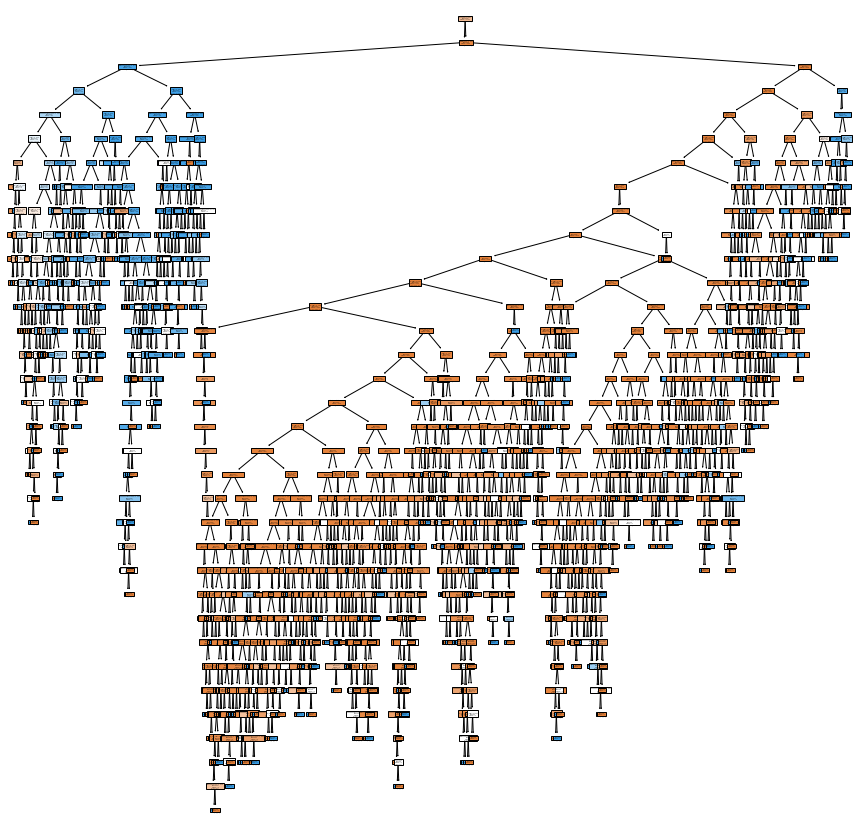

In [68]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(model2, filled=True, feature_names=x.columns)

In [31]:
from sklearn.model_selection import GridSearchCV

In [35]:
rf = RandomForestClassifier()
param_rf = {'n_estimators':[200, 400, 500, 600, 700, 800, 1000]}

gscv_rf = GridSearchCV(rf, param_grid=param_rf, n_jobs=-1)
gscv_rf.fit(x_train, y_train)

pred_rf = gscv_rf.predict(x_test)
print(confusion_matrix(y_test, pred_rf))
print(accuracy_score(y_test, pred_rf), recall_score(y_test, pred_rf), precision_score(y_test, pred_rf),  f1_score(y_test, pred_rf))

[[20714    36]
 [   87  9529]]
0.9959494171112429 0.9909525790349417 0.9962362780972295 0.9935874042020749


In [36]:
print(gscv_rf.best_params_)

{'n_estimators': 600}

In [37]:
gb = GradientBoostingClassifier()
param_gb = {'n_estimators':[700, 800, 900, 1000, 1100, 1200, 1300]}

gscv_gb = GridSearchCV(gb, param_grid=param_gb, n_jobs=-1)
gscv_gb.fit(x_train, y_train)

pred_gb = gscv_gb.predict(x_test)
print(confusion_matrix(y_test, pred_gb))
print(accuracy_score(y_test, pred_gb), recall_score(y_test, pred_gb), precision_score(y_test, pred_gb),  f1_score(y_test, pred_gb))

[[20712    38]
 [   92  9524]]
0.9957188961338339 0.990432612312812 0.9960259359966535 0.9932213995202837


In [38]:
gscv_gb.best_params_

{'n_estimators': 700}

In [39]:
ab = AdaBoostClassifier()
param_ab = {'n_estimators':[700, 800, 900, 1000, 1100, 1200, 1300]}

gscv_ab = GridSearchCV(ab, param_grid=param_ab, n_jobs=-1)
gscv_ab.fit(x_train, y_train)

pred_ab = gscv_ab.predict(x_test)
print(confusion_matrix(y_test, pred_ab))
print(accuracy_score(y_test, pred_ab), recall_score(y_test, pred_ab), precision_score(y_test, pred_ab),  f1_score(y_test, pred_ab))

[[20683    67]
 [  108  9508]]
0.9942369755647764 0.9887687188019967 0.9930026109660575 0.9908811422020739


In [40]:
gscv_ab.best_params_

{'n_estimators': 700}

In [41]:
xb = xgb.XGBClassifier()
param_xb = {'n_estimators':[700, 800, 900, 1000, 1100, 1200, 1300]}

gscv_xb = GridSearchCV(xb, param_grid=param_xb, n_jobs=-1)
gscv_xb.fit(x_train, y_train)

pred_xb = gscv_xb.predict(x_test)
print(confusion_matrix(y_test, pred_xb))
print(accuracy_score(y_test, pred_xb), recall_score(y_test, pred_xb), precision_score(y_test, pred_xb),  f1_score(y_test, pred_xb))

D:\AnacondaNavigator\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:39:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[20707    43]
 [   84  9532]]
0.9958176908384377 0.9912645590682196 0.995509138381201 0.9933823146266478


In [42]:
gscv_xb.best_params_

{'n_estimators': 700}

In [32]:
cb = CatBoostClassifier()
param_cb = {'n_estimators':[500, 600, 700, 800, 900, 1000]}

gscv_cb = GridSearchCV(cb, param_grid=param_cb, n_jobs=-1)
gscv_cb.fit(x_train, y_train)

pred_cb = gscv_cb.predict(x_test)
print(confusion_matrix(y_test, pred_cb))
print(accuracy_score(y_test, pred_cb), recall_score(y_test, pred_cb), precision_score(y_test, pred_cb), f1_score(y_test, pred_cb))

Learning rate set to 0.079982
0:	learn: 0.4884317	total: 42.5ms	remaining: 42.5s
1:	learn: 0.3391969	total: 77.4ms	remaining: 38.6s
2:	learn: 0.2446293	total: 113ms	remaining: 37.4s
3:	learn: 0.1817542	total: 148ms	remaining: 37s
4:	learn: 0.1397579	total: 172ms	remaining: 34.3s
5:	learn: 0.1084162	total: 204ms	remaining: 33.8s
6:	learn: 0.0887626	total: 237ms	remaining: 33.6s
7:	learn: 0.0736360	total: 269ms	remaining: 33.4s
8:	learn: 0.0619247	total: 304ms	remaining: 33.5s
9:	learn: 0.0535453	total: 340ms	remaining: 33.7s
10:	learn: 0.0472770	total: 367ms	remaining: 33s
11:	learn: 0.0425446	total: 396ms	remaining: 32.6s
12:	learn: 0.0389147	total: 430ms	remaining: 32.6s
13:	learn: 0.0363875	total: 462ms	remaining: 32.5s
14:	learn: 0.0344540	total: 497ms	remaining: 32.6s
15:	learn: 0.0327808	total: 527ms	remaining: 32.4s
16:	learn: 0.0314837	total: 558ms	remaining: 32.3s
17:	learn: 0.0303401	total: 588ms	remaining: 32.1s
18:	learn: 0.0294775	total: 614ms	remaining: 31.7s
19:	learn: 0.

164:	learn: 0.0173595	total: 5.08s	remaining: 25.7s
165:	learn: 0.0173584	total: 5.1s	remaining: 25.6s
166:	learn: 0.0173487	total: 5.14s	remaining: 25.6s
167:	learn: 0.0173447	total: 5.16s	remaining: 25.6s
168:	learn: 0.0173187	total: 5.19s	remaining: 25.5s
169:	learn: 0.0172877	total: 5.22s	remaining: 25.5s
170:	learn: 0.0172514	total: 5.24s	remaining: 25.4s
171:	learn: 0.0172369	total: 5.27s	remaining: 25.4s
172:	learn: 0.0172261	total: 5.3s	remaining: 25.4s
173:	learn: 0.0171880	total: 5.34s	remaining: 25.3s
174:	learn: 0.0171742	total: 5.37s	remaining: 25.3s
175:	learn: 0.0171386	total: 5.41s	remaining: 25.3s
176:	learn: 0.0171182	total: 5.44s	remaining: 25.3s
177:	learn: 0.0171182	total: 5.46s	remaining: 25.2s
178:	learn: 0.0171182	total: 5.49s	remaining: 25.2s
179:	learn: 0.0171147	total: 5.51s	remaining: 25.1s
180:	learn: 0.0171146	total: 5.54s	remaining: 25s
181:	learn: 0.0171064	total: 5.57s	remaining: 25s
182:	learn: 0.0170918	total: 5.6s	remaining: 25s
183:	learn: 0.0170483

326:	learn: 0.0159463	total: 9.49s	remaining: 19.5s
327:	learn: 0.0159462	total: 9.51s	remaining: 19.5s
328:	learn: 0.0159357	total: 9.55s	remaining: 19.5s
329:	learn: 0.0159289	total: 9.59s	remaining: 19.5s
330:	learn: 0.0159173	total: 9.62s	remaining: 19.4s
331:	learn: 0.0159173	total: 9.64s	remaining: 19.4s
332:	learn: 0.0159173	total: 9.66s	remaining: 19.4s
333:	learn: 0.0159173	total: 9.68s	remaining: 19.3s
334:	learn: 0.0159173	total: 9.7s	remaining: 19.3s
335:	learn: 0.0159173	total: 9.73s	remaining: 19.2s
336:	learn: 0.0159173	total: 9.75s	remaining: 19.2s
337:	learn: 0.0159173	total: 9.78s	remaining: 19.1s
338:	learn: 0.0159051	total: 9.81s	remaining: 19.1s
339:	learn: 0.0158945	total: 9.84s	remaining: 19.1s
340:	learn: 0.0158874	total: 9.88s	remaining: 19.1s
341:	learn: 0.0158673	total: 9.91s	remaining: 19.1s
342:	learn: 0.0158557	total: 9.94s	remaining: 19s
343:	learn: 0.0158296	total: 9.97s	remaining: 19s
344:	learn: 0.0158296	total: 10s	remaining: 19s
345:	learn: 0.0158221

492:	learn: 0.0151222	total: 13.9s	remaining: 14.3s
493:	learn: 0.0151222	total: 13.9s	remaining: 14.3s
494:	learn: 0.0151222	total: 14s	remaining: 14.2s
495:	learn: 0.0151222	total: 14s	remaining: 14.2s
496:	learn: 0.0151190	total: 14s	remaining: 14.2s
497:	learn: 0.0151030	total: 14s	remaining: 14.1s
498:	learn: 0.0150924	total: 14.1s	remaining: 14.1s
499:	learn: 0.0150924	total: 14.1s	remaining: 14.1s
500:	learn: 0.0150891	total: 14.1s	remaining: 14.1s
501:	learn: 0.0150833	total: 14.1s	remaining: 14s
502:	learn: 0.0150801	total: 14.2s	remaining: 14s
503:	learn: 0.0150678	total: 14.2s	remaining: 14s
504:	learn: 0.0150564	total: 14.2s	remaining: 14s
505:	learn: 0.0150452	total: 14.3s	remaining: 13.9s
506:	learn: 0.0150452	total: 14.3s	remaining: 13.9s
507:	learn: 0.0150452	total: 14.3s	remaining: 13.8s
508:	learn: 0.0150452	total: 14.3s	remaining: 13.8s
509:	learn: 0.0150452	total: 14.3s	remaining: 13.8s
510:	learn: 0.0150430	total: 14.4s	remaining: 13.8s
511:	learn: 0.0150180	total:

651:	learn: 0.0148487	total: 17.7s	remaining: 9.43s
652:	learn: 0.0148487	total: 17.7s	remaining: 9.39s
653:	learn: 0.0148487	total: 17.7s	remaining: 9.36s
654:	learn: 0.0148487	total: 17.7s	remaining: 9.34s
655:	learn: 0.0148487	total: 17.7s	remaining: 9.31s
656:	learn: 0.0148487	total: 17.8s	remaining: 9.28s
657:	learn: 0.0148486	total: 17.8s	remaining: 9.25s
658:	learn: 0.0148486	total: 17.8s	remaining: 9.21s
659:	learn: 0.0148486	total: 17.8s	remaining: 9.18s
660:	learn: 0.0148486	total: 17.8s	remaining: 9.15s
661:	learn: 0.0148486	total: 17.9s	remaining: 9.12s
662:	learn: 0.0148427	total: 17.9s	remaining: 9.1s
663:	learn: 0.0148347	total: 17.9s	remaining: 9.07s
664:	learn: 0.0148346	total: 18s	remaining: 9.04s
665:	learn: 0.0148346	total: 18s	remaining: 9.02s
666:	learn: 0.0148346	total: 18s	remaining: 8.99s
667:	learn: 0.0148346	total: 18s	remaining: 8.96s
668:	learn: 0.0148346	total: 18.1s	remaining: 8.93s
669:	learn: 0.0148346	total: 18.1s	remaining: 8.9s
670:	learn: 0.0148346	

818:	learn: 0.0147879	total: 21.4s	remaining: 4.73s
819:	learn: 0.0147879	total: 21.4s	remaining: 4.7s
820:	learn: 0.0147879	total: 21.4s	remaining: 4.67s
821:	learn: 0.0147879	total: 21.5s	remaining: 4.64s
822:	learn: 0.0147879	total: 21.5s	remaining: 4.62s
823:	learn: 0.0147878	total: 21.5s	remaining: 4.59s
824:	learn: 0.0147878	total: 21.5s	remaining: 4.57s
825:	learn: 0.0147878	total: 21.5s	remaining: 4.54s
826:	learn: 0.0147878	total: 21.6s	remaining: 4.51s
827:	learn: 0.0147878	total: 21.6s	remaining: 4.48s
828:	learn: 0.0147878	total: 21.6s	remaining: 4.46s
829:	learn: 0.0147878	total: 21.6s	remaining: 4.43s
830:	learn: 0.0147878	total: 21.7s	remaining: 4.4s
831:	learn: 0.0147878	total: 21.7s	remaining: 4.38s
832:	learn: 0.0147878	total: 21.7s	remaining: 4.35s
833:	learn: 0.0147878	total: 21.7s	remaining: 4.32s
834:	learn: 0.0147878	total: 21.7s	remaining: 4.3s
835:	learn: 0.0147878	total: 21.8s	remaining: 4.27s
836:	learn: 0.0147878	total: 21.8s	remaining: 4.24s
837:	learn: 0.0

986:	learn: 0.0146667	total: 25.2s	remaining: 331ms
987:	learn: 0.0146667	total: 25.2s	remaining: 306ms
988:	learn: 0.0146667	total: 25.2s	remaining: 280ms
989:	learn: 0.0146667	total: 25.2s	remaining: 255ms
990:	learn: 0.0146667	total: 25.2s	remaining: 229ms
991:	learn: 0.0146667	total: 25.3s	remaining: 204ms
992:	learn: 0.0146667	total: 25.3s	remaining: 178ms
993:	learn: 0.0146667	total: 25.3s	remaining: 153ms
994:	learn: 0.0146667	total: 25.3s	remaining: 127ms
995:	learn: 0.0146667	total: 25.3s	remaining: 102ms
996:	learn: 0.0146667	total: 25.4s	remaining: 76.3ms
997:	learn: 0.0146667	total: 25.4s	remaining: 50.9ms
998:	learn: 0.0146666	total: 25.4s	remaining: 25.4ms
999:	learn: 0.0146666	total: 25.4s	remaining: 0us
[[20717    33]
 [   94  9522]]
0.9958176908384377 0.9902246256239601 0.9965463108320252 0.993375410776694


In [33]:
gscv_cb.best_params_

{'n_estimators': 1000}

In [33]:
import math
n = (int(math.sqrt(x_train.shape[0]))//2)*2+1

In [34]:
knn = KNeighborsClassifier(n_neighbors=n, weights='distance')
knn.fit(x_train, y_train)

pred_knn = knn.predict(x_test)
print(confusion_matrix(y_test, pred_knn))
print(accuracy_score(y_test, pred_knn), recall_score(y_test, pred_knn), precision_score(y_test, pred_knn),  f1_score(y_test, pred_knn))

[[20674    76]
 [  207  9409]]
0.9906803661990384 0.9784733777038269 0.991987348444913 0.9851840217789645


In [45]:
sv = SVC()
sv.fit(x_train, y_train)

pred_sv = sv.predict(x_test)
print(confusion_matrix(y_test, pred_sv))
print(accuracy_score(y_test, pred_sv), recall_score(y_test, pred_sv), precision_score(y_test, pred_sv),  f1_score(y_test, pred_sv))

[[20690    60]
 [  125  9491]]
0.9939076598827636 0.9870008319467554 0.9937179352947335 0.9903479939479313


In [35]:
for i in [53, 72, 96, 21]:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i, stratify=y)

    ss = StandardScaler()
    ss.fit(x_test)

    x_train = ss.transform(x_train)
    x_test = ss.transform(x_test)


    model = LogisticRegression()
    model.fit(x_train, y_train)

    pred = model.predict(x_test)
    print("LR:")
    print(confusion_matrix(y_test, pred))
    print(accuracy_score(y_test, pred), recall_score(y_test, pred), precision_score(y_test, pred),  f1_score(y_test, pred))


    percep = Perceptron(random_state=42)
    percep.fit(x_train, y_train)

    pred_percep = percep.predict(x_test)
    print("Percep:")
    print(confusion_matrix(y_test, pred_percep))
    print(accuracy_score(y_test, pred_percep), recall_score(y_test, pred_percep), precision_score(y_test, pred_percep),  f1_score(y_test, pred_percep))


    model2 = DecisionTreeClassifier()
    model2.fit(x_train, y_train)

    pred2 = model2.predict(x_test)
    print("DTC:")
    print(confusion_matrix(y_test, pred2))
    print(accuracy_score(y_test, pred2), recall_score(y_test, pred2), precision_score(y_test, pred2),  f1_score(y_test, pred2))


    rf = RandomForestClassifier(n_estimators=600)
    rf.fit(x_train, y_train)

    pred_rf = rf.predict(x_test)
    print("RF:")
    print(confusion_matrix(y_test, pred_rf))
    print(accuracy_score(y_test, pred_rf), recall_score(y_test, pred_rf), precision_score(y_test, pred_rf),  f1_score(y_test, pred_rf))


    gb = GradientBoostingClassifier(n_estimators=700)
    gb.fit(x_train, y_train)

    pred_gb = gb.predict(x_test)
    print("GB:")
    print(confusion_matrix(y_test, pred_gb))
    print(accuracy_score(y_test, pred_gb), recall_score(y_test, pred_gb), precision_score(y_test, pred_gb),  f1_score(y_test, pred_gb))


    ab = AdaBoostClassifier(n_estimators=700)
    ab.fit(x_train, y_train)

    pred_ab = ab.predict(x_test)
    print("AB:")
    print(confusion_matrix(y_test, pred_ab))
    print(accuracy_score(y_test, pred_ab), recall_score(y_test, pred_ab), precision_score(y_test, pred_ab),  f1_score(y_test, pred_ab))


    xb = xgb.XGBClassifier(n_estimators=700)
    xb.fit(x_train, y_train)

    pred_xb = xb.predict(x_test)
    print("XGB:")
    print(confusion_matrix(y_test, pred_xb))
    print(accuracy_score(y_test, pred_xb), recall_score(y_test, pred_xb), precision_score(y_test, pred_xb),  f1_score(y_test, pred_xb))


    n = (int(math.sqrt(x_train.shape[0]))//2)*2+1

    knn = KNeighborsClassifier(n_neighbors=n, weights='distance')
    knn.fit(x_train, y_train)

    pred_knn = knn.predict(x_test)
    print("KNN:")
    print(confusion_matrix(y_test, pred_knn))
    print(accuracy_score(y_test, pred_knn), recall_score(y_test, pred_knn), precision_score(y_test, pred_knn),  f1_score(y_test, pred_knn))


    sv = SVC()
    sv.fit(x_train, y_train)

    pred_sv = sv.predict(x_test)
    print("SVC:")
    print(confusion_matrix(y_test, pred_sv))
    print(accuracy_score(y_test, pred_sv), recall_score(y_test, pred_sv), precision_score(y_test, pred_sv),  f1_score(y_test, pred_sv))

LR:
[[20670    80]
 [  112  9504]]
0.9936771389053547 0.9883527454242929 0.991652754590985 0.99
Percep:
[[20644   106]
 [  114  9502]]
0.9927550549957189 0.9881447587354409 0.9889675270607827 0.9885559717020392
DTC:
[[20635   115]
 [   92  9524]]
0.9931831653823355 0.990432612312812 0.988069301794792 0.9892495455725786
RF:
[[20708    42]
 [   86  9530]]
0.9957847592702365 0.9910565723793677 0.9956122022565816 0.9933291640608714
GB:
[[20697    53]
 [   86  9530]]
0.9954225120200224 0.9910565723793677 0.9944693728477513 0.992760039585395
AB:
[[20658    92]
 [  109  9507]]
0.9933807547915432 0.9886647254575707 0.9904156682987811 0.9895394223263076


D:\AnacondaNavigator\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:45:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB:
[[20698    52]
 [   83  9533]]
0.9955542382928275 0.9913685524126455 0.9945748565466875 0.992969116191865
KNN:
[[20665    85]
 [  173  9443]]
0.9915036554040704 0.9820091514143094 0.9910789252728799 0.9865231926452152
SVC:
[[20664    86]
 [   94  9522]]
0.99407231772377 0.9902246256239601 0.9910491257285595 0.9906367041198502
LR:
[[20677    73]
 [  118  9498]]
0.993710070473556 0.9877287853577371 0.9923727928116184 0.9900453432011258
Percep:
[[20589   161]
 [  107  9509]]
0.9911743397220576 0.9888727121464226 0.9833505687693899 0.98610390957171
DTC:
[[20641   109]
 [  123  9493]]
0.9923598761773036 0.9872088186356073 0.9886481982920224 0.9879279841814965
RF:
[[20708    42]
 [ 

D:\AnacondaNavigator\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:52:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB:
[[20710    40]
 [   95  9521]]
0.9955542382928275 0.9901206322795341 0.9958163372032214 0.9929603170464618
KNN:
[[20672    78]
 [  192  9424]]
0.991108476585655 0.9800332778702163 0.9917912018522417 0.9858771838058374
SVC:
[[20686    64]
 [  102  9514]]
0.9945333596785879 0.9893926788685524 0.9933180204635623 0.9913514639991663
LR:
[[20674    76]
 [  115  9501]]
0.993710070473556 0.9880407653910149 0.9920643207685079 0.990048455165946
Percep:
[[20659    91]
 [  201  9415]]
0.9903839820852269 0.9790973377703827 0.9904270986745214 0.9847296307917581
DTC:
[[20618   132]
 [  113  9503]]
0.991931765790687 0.9882487520798668 0.9862999481058641 0.987273388395408
RF:
[[20705    45]
 [

D:\AnacondaNavigator\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGB:
[[20700    50]
 [   95  9521]]
0.9952249226108147 0.9901206322795341 0.9947758854874099 0.9924427998123729
KNN:
[[20654    96]
 [  191  9425]]
0.9905486399262333 0.9801372712146422 0.9899170255225291 0.9850028740136906
SVC:
[[20668    82]
 [   97  9519]]
0.9941052492919713 0.9899126455906821 0.9914592229976044 0.9906853306967789
LR:
[[20684    66]
 [  124  9492]]
0.9937430020417573 0.9871048252911814 0.9930947897049592 0.9900907478877647
Percep:
[[20640   110]
 [  141  9475]]
0.9917341763814793 0.9853369384359401 0.9885237350026083 0.986927764178949
DTC:
[[20632   118]
 [  113  9503]]
0.9923928077455049 0.9882487520798668 0.9877351626650036 0.9879918906274368
RF:
[[20716    34]
 [   98  9518]]
0.9956530329974314 0.9898086522462562 0.9964405360134003 0.9931135225375626
GB:
[[20717    33]
 [   97  9519]]
0.9957188961338339 0.9899126455906821 0.9965452261306532 0.9932178631051752
AB:
[[20678    72]
 [  113  9503]]
0.9939076598827636 0.9882487520798668 0.9924804177545692 0.99036006461

D:\AnacondaNavigator\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:03:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB:
[[20707    43]
 [   99  9517]]
0.9953237173154186 0.9897046589018302 0.9955020920502092 0.9925949103045474
KNN:
[[20674    76]
 [  213  9403]]
0.9904827767898308 0.9778494176372712 0.9919822766114569 0.9848651479444881
SVC:
[[20684    66]
 [  132  9484]]
0.993479549496147 0.9862728785357737 0.9930890052356021 0.9896692058854221


In [45]:
lr_m = [99.41, 99.37, 99.37, 99.37, 99.37]
percep_m = [99.38, 99.28, 99.12, 99.04, 99.17]
dtc_m = [99.24, 99.32, 99.24, 99.19, 99.24]
rf_m = [99.59, 99.58, 99.55, 99.57, 99.57]
gb_m = [99.57, 99.54, 99.54, 99.53, 99.57]
ab_m = [99.42, 99.34, 99.37, 99.38, 99.39]
xgb_m = [99.58, 99.56, 99.56, 99.52, 99.53]
knn_m = [99.04, 99.15, 99.11, 99.05, 99.05]
svc_m = [99.39, 99.41, 99.45, 99.41, 99.35]

In [51]:
for i in [lr_m, percep_m, dtc_m, rf_m, gb_m, ab_m, xgb_m, knn_m, svc_m]:
    print(np.mean(i), np.std(i))

99.378 0.01599999999999682
99.19800000000001 0.11973303637676258
99.24600000000001 0.04176122603564083
99.572 0.013266499161423672
99.55000000000001 0.016733200530676486
99.38 0.026076809620809768
99.55 0.021908902300207474
99.08000000000001 0.04289522117905584
99.402 0.032496153618546124


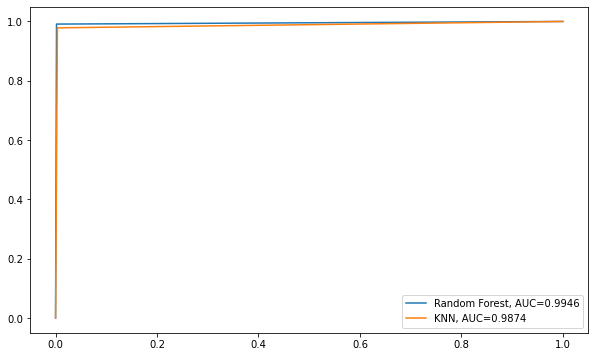

In [67]:
plt.figure(figsize=(10,6))

fpr, tpr, _ = roc_curve(y_test, pred_rf)
auc = round(roc_auc_score(y_test, pred_rf), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

fpr, tpr, _ = roc_curve(y_test, pred_knn)
auc = round(roc_auc_score(y_test, pred_knn), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))

plt.legend()

In [62]:
rf = RandomForestClassifier(n_estimators=600)
rf.fit(x_train, y_train)

pred_rf = rf.predict(x_test)
print(confusion_matrix(y_test, pred_rf))
print(accuracy_score(y_test, pred_rf), recall_score(y_test, pred_rf), precision_score(y_test, pred_rf),  f1_score(y_test, pred_rf))

[[20711    39]
 [   85  9531]]
0.9959164855430416 0.9911605657237936 0.9959247648902821 0.9935369540289796


In [63]:
n = (int(math.sqrt(x_train.shape[0]))//2)*2+1

knn = KNeighborsClassifier(n_neighbors=n, weights='distance')
knn.fit(x_train, y_train)

pred_knn = knn.predict(x_test)
print("KNN:")
print(confusion_matrix(y_test, pred_knn))
print(accuracy_score(y_test, pred_knn), recall_score(y_test, pred_knn), precision_score(y_test, pred_knn),  f1_score(y_test, pred_knn))

KNN:
[[20674    76]
 [  207  9409]]
0.9906803661990384 0.9784733777038269 0.991987348444913 0.9851840217789645


In [34]:
for i in [53, 72, 96, 21]:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i, stratify=y)

    ss = StandardScaler()
    ss.fit(x_test)

    x_train = ss.transform(x_train)
    x_test = ss.transform(x_test)
    
    cb = CatBoostClassifier(n_estimators=1000)
    cb.fit(x_train, y_train)

    pred_cb = cb.predict(x_test)
    print("CB:")
    print(confusion_matrix(y_test, pred_cb))
    print(accuracy_score(y_test, pred_cb), recall_score(y_test, pred_cb), precision_score(y_test, pred_cb),  f1_score(y_test, pred_cb))

Learning rate set to 0.079982
0:	learn: 0.4890607	total: 37.7ms	remaining: 37.7s
1:	learn: 0.3402435	total: 69.7ms	remaining: 34.8s
2:	learn: 0.2465677	total: 101ms	remaining: 33.7s
3:	learn: 0.1835613	total: 132ms	remaining: 32.8s
4:	learn: 0.1410369	total: 162ms	remaining: 32.2s
5:	learn: 0.1095808	total: 190ms	remaining: 31.5s
6:	learn: 0.0893970	total: 220ms	remaining: 31.2s
7:	learn: 0.0739401	total: 252ms	remaining: 31.3s
8:	learn: 0.0624233	total: 284ms	remaining: 31.3s
9:	learn: 0.0547426	total: 314ms	remaining: 31.1s
10:	learn: 0.0489792	total: 345ms	remaining: 31s
11:	learn: 0.0439117	total: 375ms	remaining: 30.9s
12:	learn: 0.0396619	total: 408ms	remaining: 31s
13:	learn: 0.0367419	total: 439ms	remaining: 30.9s
14:	learn: 0.0343143	total: 474ms	remaining: 31.1s
15:	learn: 0.0324322	total: 505ms	remaining: 31s
16:	learn: 0.0309395	total: 535ms	remaining: 30.9s
17:	learn: 0.0299528	total: 564ms	remaining: 30.8s
18:	learn: 0.0288212	total: 595ms	remaining: 30.7s
19:	learn: 0.02

162:	learn: 0.0173917	total: 5.05s	remaining: 25.9s
163:	learn: 0.0173835	total: 5.08s	remaining: 25.9s
164:	learn: 0.0173637	total: 5.1s	remaining: 25.8s
165:	learn: 0.0173544	total: 5.13s	remaining: 25.8s
166:	learn: 0.0173217	total: 5.16s	remaining: 25.7s
167:	learn: 0.0172930	total: 5.18s	remaining: 25.7s
168:	learn: 0.0172537	total: 5.21s	remaining: 25.6s
169:	learn: 0.0172059	total: 5.25s	remaining: 25.6s
170:	learn: 0.0171850	total: 5.27s	remaining: 25.6s
171:	learn: 0.0171564	total: 5.3s	remaining: 25.5s
172:	learn: 0.0171188	total: 5.34s	remaining: 25.5s
173:	learn: 0.0171110	total: 5.37s	remaining: 25.5s
174:	learn: 0.0170959	total: 5.4s	remaining: 25.5s
175:	learn: 0.0170929	total: 5.43s	remaining: 25.4s
176:	learn: 0.0170929	total: 5.45s	remaining: 25.4s
177:	learn: 0.0170562	total: 5.49s	remaining: 25.3s
178:	learn: 0.0170327	total: 5.51s	remaining: 25.3s
179:	learn: 0.0170210	total: 5.54s	remaining: 25.2s
180:	learn: 0.0170114	total: 5.57s	remaining: 25.2s
181:	learn: 0.0

326:	learn: 0.0168853	total: 8.88s	remaining: 18.3s
327:	learn: 0.0168853	total: 8.91s	remaining: 18.2s
328:	learn: 0.0168853	total: 8.93s	remaining: 18.2s
329:	learn: 0.0168853	total: 8.95s	remaining: 18.2s
330:	learn: 0.0168853	total: 8.97s	remaining: 18.1s
331:	learn: 0.0168852	total: 8.99s	remaining: 18.1s
332:	learn: 0.0168852	total: 9.01s	remaining: 18.1s
333:	learn: 0.0168852	total: 9.04s	remaining: 18s
334:	learn: 0.0168852	total: 9.06s	remaining: 18s
335:	learn: 0.0168806	total: 9.09s	remaining: 18s
336:	learn: 0.0168806	total: 9.12s	remaining: 17.9s
337:	learn: 0.0168806	total: 9.14s	remaining: 17.9s
338:	learn: 0.0168806	total: 9.16s	remaining: 17.9s
339:	learn: 0.0168806	total: 9.19s	remaining: 17.8s
340:	learn: 0.0168806	total: 9.21s	remaining: 17.8s
341:	learn: 0.0168806	total: 9.23s	remaining: 17.8s
342:	learn: 0.0168806	total: 9.26s	remaining: 17.7s
343:	learn: 0.0168806	total: 9.28s	remaining: 17.7s
344:	learn: 0.0168805	total: 9.3s	remaining: 17.7s
345:	learn: 0.01688

487:	learn: 0.0164924	total: 13s	remaining: 13.6s
488:	learn: 0.0164924	total: 13s	remaining: 13.6s
489:	learn: 0.0164924	total: 13s	remaining: 13.6s
490:	learn: 0.0164924	total: 13s	remaining: 13.5s
491:	learn: 0.0164923	total: 13.1s	remaining: 13.5s
492:	learn: 0.0164923	total: 13.1s	remaining: 13.5s
493:	learn: 0.0164923	total: 13.1s	remaining: 13.4s
494:	learn: 0.0164923	total: 13.1s	remaining: 13.4s
495:	learn: 0.0164923	total: 13.2s	remaining: 13.4s
496:	learn: 0.0164923	total: 13.2s	remaining: 13.3s
497:	learn: 0.0164923	total: 13.2s	remaining: 13.3s
498:	learn: 0.0164922	total: 13.2s	remaining: 13.3s
499:	learn: 0.0164922	total: 13.3s	remaining: 13.3s
500:	learn: 0.0164922	total: 13.3s	remaining: 13.2s
501:	learn: 0.0164922	total: 13.3s	remaining: 13.2s
502:	learn: 0.0164922	total: 13.3s	remaining: 13.2s
503:	learn: 0.0164921	total: 13.4s	remaining: 13.1s
504:	learn: 0.0164921	total: 13.4s	remaining: 13.1s
505:	learn: 0.0164921	total: 13.4s	remaining: 13.1s
506:	learn: 0.016492

649:	learn: 0.0164022	total: 16.9s	remaining: 9.08s
650:	learn: 0.0164022	total: 16.9s	remaining: 9.05s
651:	learn: 0.0164021	total: 16.9s	remaining: 9.03s
652:	learn: 0.0164021	total: 16.9s	remaining: 9s
653:	learn: 0.0164021	total: 17s	remaining: 8.97s
654:	learn: 0.0164020	total: 17s	remaining: 8.95s
655:	learn: 0.0164020	total: 17s	remaining: 8.92s
656:	learn: 0.0163813	total: 17s	remaining: 8.9s
657:	learn: 0.0163813	total: 17.1s	remaining: 8.87s
658:	learn: 0.0163629	total: 17.1s	remaining: 8.85s
659:	learn: 0.0163609	total: 17.1s	remaining: 8.82s
660:	learn: 0.0163466	total: 17.2s	remaining: 8.8s
661:	learn: 0.0163236	total: 17.2s	remaining: 8.78s
662:	learn: 0.0162881	total: 17.2s	remaining: 8.76s
663:	learn: 0.0162881	total: 17.3s	remaining: 8.73s
664:	learn: 0.0162881	total: 17.3s	remaining: 8.7s
665:	learn: 0.0162880	total: 17.3s	remaining: 8.68s
666:	learn: 0.0162880	total: 17.3s	remaining: 8.65s
667:	learn: 0.0162880	total: 17.3s	remaining: 8.62s
668:	learn: 0.0162880	tota

811:	learn: 0.0159632	total: 20.9s	remaining: 4.83s
812:	learn: 0.0159632	total: 20.9s	remaining: 4.8s
813:	learn: 0.0159632	total: 20.9s	remaining: 4.78s
814:	learn: 0.0159631	total: 20.9s	remaining: 4.75s
815:	learn: 0.0159631	total: 20.9s	remaining: 4.72s
816:	learn: 0.0159583	total: 21s	remaining: 4.7s
817:	learn: 0.0159583	total: 21s	remaining: 4.67s
818:	learn: 0.0159582	total: 21s	remaining: 4.65s
819:	learn: 0.0159582	total: 21.1s	remaining: 4.62s
820:	learn: 0.0159582	total: 21.1s	remaining: 4.59s
821:	learn: 0.0159582	total: 21.1s	remaining: 4.57s
822:	learn: 0.0159582	total: 21.1s	remaining: 4.54s
823:	learn: 0.0159582	total: 21.1s	remaining: 4.52s
824:	learn: 0.0159582	total: 21.2s	remaining: 4.49s
825:	learn: 0.0159567	total: 21.2s	remaining: 4.46s
826:	learn: 0.0159567	total: 21.2s	remaining: 4.44s
827:	learn: 0.0159566	total: 21.2s	remaining: 4.41s
828:	learn: 0.0159566	total: 21.3s	remaining: 4.39s
829:	learn: 0.0159566	total: 21.3s	remaining: 4.36s
830:	learn: 0.015956

972:	learn: 0.0159265	total: 24.6s	remaining: 682ms
973:	learn: 0.0159265	total: 24.6s	remaining: 656ms
974:	learn: 0.0159264	total: 24.6s	remaining: 631ms
975:	learn: 0.0159264	total: 24.6s	remaining: 605ms
976:	learn: 0.0159264	total: 24.6s	remaining: 580ms
977:	learn: 0.0159264	total: 24.7s	remaining: 555ms
978:	learn: 0.0159264	total: 24.7s	remaining: 530ms
979:	learn: 0.0159264	total: 24.7s	remaining: 504ms
980:	learn: 0.0159264	total: 24.7s	remaining: 479ms
981:	learn: 0.0159264	total: 24.8s	remaining: 454ms
982:	learn: 0.0159264	total: 24.8s	remaining: 428ms
983:	learn: 0.0159264	total: 24.8s	remaining: 403ms
984:	learn: 0.0159264	total: 24.8s	remaining: 378ms
985:	learn: 0.0159264	total: 24.8s	remaining: 353ms
986:	learn: 0.0159264	total: 24.9s	remaining: 328ms
987:	learn: 0.0159264	total: 24.9s	remaining: 302ms
988:	learn: 0.0159263	total: 24.9s	remaining: 277ms
989:	learn: 0.0159263	total: 24.9s	remaining: 252ms
990:	learn: 0.0159263	total: 25s	remaining: 227ms
991:	learn: 0.

133:	learn: 0.0177859	total: 4.21s	remaining: 27.2s
134:	learn: 0.0177585	total: 4.24s	remaining: 27.2s
135:	learn: 0.0177365	total: 4.27s	remaining: 27.1s
136:	learn: 0.0176962	total: 4.3s	remaining: 27.1s
137:	learn: 0.0176599	total: 4.34s	remaining: 27.1s
138:	learn: 0.0176533	total: 4.37s	remaining: 27.1s
139:	learn: 0.0176094	total: 4.4s	remaining: 27s
140:	learn: 0.0175885	total: 4.43s	remaining: 27s
141:	learn: 0.0175712	total: 4.47s	remaining: 27s
142:	learn: 0.0175554	total: 4.5s	remaining: 27s
143:	learn: 0.0175138	total: 4.54s	remaining: 27s
144:	learn: 0.0175040	total: 4.56s	remaining: 26.9s
145:	learn: 0.0174820	total: 4.6s	remaining: 26.9s
146:	learn: 0.0174720	total: 4.63s	remaining: 26.9s
147:	learn: 0.0174337	total: 4.66s	remaining: 26.8s
148:	learn: 0.0173966	total: 4.7s	remaining: 26.8s
149:	learn: 0.0173761	total: 4.72s	remaining: 26.8s
150:	learn: 0.0173397	total: 4.76s	remaining: 26.8s
151:	learn: 0.0173266	total: 4.79s	remaining: 26.7s
152:	learn: 0.0173116	total

294:	learn: 0.0150769	total: 9.44s	remaining: 22.6s
295:	learn: 0.0150691	total: 9.48s	remaining: 22.5s
296:	learn: 0.0150586	total: 9.51s	remaining: 22.5s
297:	learn: 0.0150506	total: 9.54s	remaining: 22.5s
298:	learn: 0.0150506	total: 9.56s	remaining: 22.4s
299:	learn: 0.0150505	total: 9.59s	remaining: 22.4s
300:	learn: 0.0150415	total: 9.62s	remaining: 22.3s
301:	learn: 0.0150351	total: 9.65s	remaining: 22.3s
302:	learn: 0.0150351	total: 9.68s	remaining: 22.3s
303:	learn: 0.0150179	total: 9.71s	remaining: 22.2s
304:	learn: 0.0150179	total: 9.74s	remaining: 22.2s
305:	learn: 0.0150098	total: 9.77s	remaining: 22.2s
306:	learn: 0.0150098	total: 9.79s	remaining: 22.1s
307:	learn: 0.0150018	total: 9.83s	remaining: 22.1s
308:	learn: 0.0149948	total: 9.86s	remaining: 22s
309:	learn: 0.0149864	total: 9.89s	remaining: 22s
310:	learn: 0.0149678	total: 9.93s	remaining: 22s
311:	learn: 0.0149488	total: 9.96s	remaining: 22s
312:	learn: 0.0149488	total: 9.99s	remaining: 21.9s
313:	learn: 0.014939

457:	learn: 0.0140344	total: 14.2s	remaining: 16.8s
458:	learn: 0.0140287	total: 14.2s	remaining: 16.8s
459:	learn: 0.0140195	total: 14.3s	remaining: 16.8s
460:	learn: 0.0140195	total: 14.3s	remaining: 16.7s
461:	learn: 0.0140131	total: 14.3s	remaining: 16.7s
462:	learn: 0.0140132	total: 14.3s	remaining: 16.6s
463:	learn: 0.0140131	total: 14.4s	remaining: 16.6s
464:	learn: 0.0140021	total: 14.4s	remaining: 16.6s
465:	learn: 0.0140021	total: 14.4s	remaining: 16.5s
466:	learn: 0.0140021	total: 14.5s	remaining: 16.5s
467:	learn: 0.0140021	total: 14.5s	remaining: 16.5s
468:	learn: 0.0140020	total: 14.5s	remaining: 16.4s
469:	learn: 0.0140020	total: 14.5s	remaining: 16.4s
470:	learn: 0.0139974	total: 14.6s	remaining: 16.3s
471:	learn: 0.0139974	total: 14.6s	remaining: 16.3s
472:	learn: 0.0139910	total: 14.6s	remaining: 16.3s
473:	learn: 0.0139767	total: 14.6s	remaining: 16.2s
474:	learn: 0.0139701	total: 14.7s	remaining: 16.2s
475:	learn: 0.0139648	total: 14.7s	remaining: 16.2s
476:	learn: 

616:	learn: 0.0134770	total: 18.5s	remaining: 11.5s
617:	learn: 0.0134770	total: 18.5s	remaining: 11.4s
618:	learn: 0.0134770	total: 18.5s	remaining: 11.4s
619:	learn: 0.0134770	total: 18.5s	remaining: 11.4s
620:	learn: 0.0134770	total: 18.6s	remaining: 11.3s
621:	learn: 0.0134703	total: 18.6s	remaining: 11.3s
622:	learn: 0.0134703	total: 18.6s	remaining: 11.3s
623:	learn: 0.0134703	total: 18.6s	remaining: 11.2s
624:	learn: 0.0134703	total: 18.7s	remaining: 11.2s
625:	learn: 0.0134703	total: 18.7s	remaining: 11.2s
626:	learn: 0.0134507	total: 18.7s	remaining: 11.1s
627:	learn: 0.0134414	total: 18.8s	remaining: 11.1s
628:	learn: 0.0134208	total: 18.8s	remaining: 11.1s
629:	learn: 0.0134149	total: 18.8s	remaining: 11.1s
630:	learn: 0.0134043	total: 18.9s	remaining: 11s
631:	learn: 0.0134001	total: 18.9s	remaining: 11s
632:	learn: 0.0134001	total: 18.9s	remaining: 11s
633:	learn: 0.0134001	total: 18.9s	remaining: 10.9s
634:	learn: 0.0133953	total: 19s	remaining: 10.9s
635:	learn: 0.013388

777:	learn: 0.0131009	total: 22.7s	remaining: 6.48s
778:	learn: 0.0130911	total: 22.8s	remaining: 6.46s
779:	learn: 0.0130911	total: 22.8s	remaining: 6.42s
780:	learn: 0.0130911	total: 22.8s	remaining: 6.39s
781:	learn: 0.0130911	total: 22.8s	remaining: 6.36s
782:	learn: 0.0130911	total: 22.9s	remaining: 6.33s
783:	learn: 0.0130911	total: 22.9s	remaining: 6.3s
784:	learn: 0.0130911	total: 22.9s	remaining: 6.27s
785:	learn: 0.0130880	total: 22.9s	remaining: 6.24s
786:	learn: 0.0130800	total: 23s	remaining: 6.21s
787:	learn: 0.0130763	total: 23s	remaining: 6.18s
788:	learn: 0.0130763	total: 23s	remaining: 6.15s
789:	learn: 0.0130763	total: 23s	remaining: 6.12s
790:	learn: 0.0130759	total: 23.1s	remaining: 6.09s
791:	learn: 0.0130759	total: 23.1s	remaining: 6.06s
792:	learn: 0.0130712	total: 23.1s	remaining: 6.03s
793:	learn: 0.0130713	total: 23.1s	remaining: 6s
794:	learn: 0.0130610	total: 23.2s	remaining: 5.97s
795:	learn: 0.0130610	total: 23.2s	remaining: 5.94s
796:	learn: 0.0130545	to

941:	learn: 0.0128310	total: 27s	remaining: 1.66s
942:	learn: 0.0128309	total: 27s	remaining: 1.63s
943:	learn: 0.0128301	total: 27s	remaining: 1.6s
944:	learn: 0.0128301	total: 27.1s	remaining: 1.57s
945:	learn: 0.0128191	total: 27.1s	remaining: 1.55s
946:	learn: 0.0128034	total: 27.1s	remaining: 1.52s
947:	learn: 0.0128034	total: 27.2s	remaining: 1.49s
948:	learn: 0.0128007	total: 27.2s	remaining: 1.46s
949:	learn: 0.0128007	total: 27.2s	remaining: 1.43s
950:	learn: 0.0127976	total: 27.2s	remaining: 1.4s
951:	learn: 0.0127935	total: 27.3s	remaining: 1.38s
952:	learn: 0.0127935	total: 27.3s	remaining: 1.35s
953:	learn: 0.0127839	total: 27.3s	remaining: 1.32s
954:	learn: 0.0127839	total: 27.4s	remaining: 1.29s
955:	learn: 0.0127726	total: 27.4s	remaining: 1.26s
956:	learn: 0.0127720	total: 27.4s	remaining: 1.23s
957:	learn: 0.0127675	total: 27.4s	remaining: 1.2s
958:	learn: 0.0127548	total: 27.5s	remaining: 1.17s
959:	learn: 0.0127489	total: 27.5s	remaining: 1.15s
960:	learn: 0.0127419

99:	learn: 0.0193340	total: 3.31s	remaining: 29.8s
100:	learn: 0.0193032	total: 3.34s	remaining: 29.7s
101:	learn: 0.0192553	total: 3.37s	remaining: 29.7s
102:	learn: 0.0191953	total: 3.4s	remaining: 29.6s
103:	learn: 0.0191524	total: 3.44s	remaining: 29.6s
104:	learn: 0.0191367	total: 3.47s	remaining: 29.6s
105:	learn: 0.0190975	total: 3.5s	remaining: 29.5s
106:	learn: 0.0190827	total: 3.53s	remaining: 29.4s
107:	learn: 0.0190449	total: 3.56s	remaining: 29.4s
108:	learn: 0.0189849	total: 3.59s	remaining: 29.4s
109:	learn: 0.0189513	total: 3.62s	remaining: 29.3s
110:	learn: 0.0189311	total: 3.65s	remaining: 29.3s
111:	learn: 0.0188992	total: 3.69s	remaining: 29.2s
112:	learn: 0.0188716	total: 3.72s	remaining: 29.2s
113:	learn: 0.0188589	total: 3.75s	remaining: 29.2s
114:	learn: 0.0188301	total: 3.78s	remaining: 29.1s
115:	learn: 0.0187806	total: 3.82s	remaining: 29.1s
116:	learn: 0.0187622	total: 3.85s	remaining: 29s
117:	learn: 0.0187385	total: 3.88s	remaining: 29s
118:	learn: 0.01872

262:	learn: 0.0161218	total: 8.24s	remaining: 23.1s
263:	learn: 0.0161034	total: 8.27s	remaining: 23.1s
264:	learn: 0.0161033	total: 8.3s	remaining: 23s
265:	learn: 0.0160797	total: 8.33s	remaining: 23s
266:	learn: 0.0160797	total: 8.36s	remaining: 22.9s
267:	learn: 0.0160692	total: 8.39s	remaining: 22.9s
268:	learn: 0.0160691	total: 8.41s	remaining: 22.9s
269:	learn: 0.0160691	total: 8.44s	remaining: 22.8s
270:	learn: 0.0160691	total: 8.46s	remaining: 22.8s
271:	learn: 0.0160691	total: 8.49s	remaining: 22.7s
272:	learn: 0.0160691	total: 8.51s	remaining: 22.7s
273:	learn: 0.0160691	total: 8.54s	remaining: 22.6s
274:	learn: 0.0160691	total: 8.56s	remaining: 22.6s
275:	learn: 0.0160691	total: 8.58s	remaining: 22.5s
276:	learn: 0.0160690	total: 8.61s	remaining: 22.5s
277:	learn: 0.0160691	total: 8.63s	remaining: 22.4s
278:	learn: 0.0160691	total: 8.65s	remaining: 22.4s
279:	learn: 0.0160690	total: 8.68s	remaining: 22.3s
280:	learn: 0.0160690	total: 8.7s	remaining: 22.3s
281:	learn: 0.0160

426:	learn: 0.0150911	total: 12.6s	remaining: 16.9s
427:	learn: 0.0150911	total: 12.6s	remaining: 16.9s
428:	learn: 0.0150911	total: 12.7s	remaining: 16.8s
429:	learn: 0.0150911	total: 12.7s	remaining: 16.8s
430:	learn: 0.0150911	total: 12.7s	remaining: 16.8s
431:	learn: 0.0150911	total: 12.7s	remaining: 16.7s
432:	learn: 0.0150911	total: 12.8s	remaining: 16.7s
433:	learn: 0.0150911	total: 12.8s	remaining: 16.7s
434:	learn: 0.0150911	total: 12.8s	remaining: 16.6s
435:	learn: 0.0150911	total: 12.8s	remaining: 16.6s
436:	learn: 0.0150911	total: 12.8s	remaining: 16.6s
437:	learn: 0.0150911	total: 12.9s	remaining: 16.5s
438:	learn: 0.0150911	total: 12.9s	remaining: 16.5s
439:	learn: 0.0150911	total: 12.9s	remaining: 16.4s
440:	learn: 0.0150910	total: 12.9s	remaining: 16.4s
441:	learn: 0.0150910	total: 13s	remaining: 16.4s
442:	learn: 0.0150910	total: 13s	remaining: 16.3s
443:	learn: 0.0150910	total: 13s	remaining: 16.3s
444:	learn: 0.0150886	total: 13s	remaining: 16.3s
445:	learn: 0.015088

585:	learn: 0.0148469	total: 16.7s	remaining: 11.8s
586:	learn: 0.0148469	total: 16.7s	remaining: 11.7s
587:	learn: 0.0148469	total: 16.7s	remaining: 11.7s
588:	learn: 0.0148469	total: 16.7s	remaining: 11.7s
589:	learn: 0.0148345	total: 16.8s	remaining: 11.7s
590:	learn: 0.0148345	total: 16.8s	remaining: 11.6s
591:	learn: 0.0148304	total: 16.8s	remaining: 11.6s
592:	learn: 0.0148303	total: 16.9s	remaining: 11.6s
593:	learn: 0.0148303	total: 16.9s	remaining: 11.5s
594:	learn: 0.0148256	total: 16.9s	remaining: 11.5s
595:	learn: 0.0148256	total: 16.9s	remaining: 11.5s
596:	learn: 0.0148256	total: 17s	remaining: 11.4s
597:	learn: 0.0148256	total: 17s	remaining: 11.4s
598:	learn: 0.0148256	total: 17s	remaining: 11.4s
599:	learn: 0.0148256	total: 17s	remaining: 11.4s
600:	learn: 0.0148256	total: 17.1s	remaining: 11.3s
601:	learn: 0.0148256	total: 17.1s	remaining: 11.3s
602:	learn: 0.0148255	total: 17.1s	remaining: 11.3s
603:	learn: 0.0148255	total: 17.1s	remaining: 11.2s
604:	learn: 0.014825

746:	learn: 0.0147173	total: 20.7s	remaining: 7.01s
747:	learn: 0.0147173	total: 20.7s	remaining: 6.98s
748:	learn: 0.0147173	total: 20.8s	remaining: 6.96s
749:	learn: 0.0147173	total: 20.8s	remaining: 6.93s
750:	learn: 0.0147173	total: 20.8s	remaining: 6.9s
751:	learn: 0.0147173	total: 20.8s	remaining: 6.87s
752:	learn: 0.0147173	total: 20.9s	remaining: 6.84s
753:	learn: 0.0147173	total: 20.9s	remaining: 6.81s
754:	learn: 0.0147173	total: 20.9s	remaining: 6.78s
755:	learn: 0.0147173	total: 20.9s	remaining: 6.75s
756:	learn: 0.0147173	total: 21s	remaining: 6.72s
757:	learn: 0.0147173	total: 21s	remaining: 6.7s
758:	learn: 0.0147172	total: 21s	remaining: 6.67s
759:	learn: 0.0147172	total: 21s	remaining: 6.64s
760:	learn: 0.0147173	total: 21s	remaining: 6.61s
761:	learn: 0.0147172	total: 21.1s	remaining: 6.58s
762:	learn: 0.0147172	total: 21.1s	remaining: 6.55s
763:	learn: 0.0147172	total: 21.1s	remaining: 6.52s
764:	learn: 0.0147172	total: 21.1s	remaining: 6.5s
765:	learn: 0.0147172	tot

906:	learn: 0.0145548	total: 24.7s	remaining: 2.53s
907:	learn: 0.0145517	total: 24.7s	remaining: 2.5s
908:	learn: 0.0145517	total: 24.7s	remaining: 2.48s
909:	learn: 0.0145517	total: 24.8s	remaining: 2.45s
910:	learn: 0.0145517	total: 24.8s	remaining: 2.42s
911:	learn: 0.0145517	total: 24.8s	remaining: 2.39s
912:	learn: 0.0145517	total: 24.8s	remaining: 2.37s
913:	learn: 0.0145517	total: 24.9s	remaining: 2.34s
914:	learn: 0.0145517	total: 24.9s	remaining: 2.31s
915:	learn: 0.0145517	total: 24.9s	remaining: 2.28s
916:	learn: 0.0145517	total: 24.9s	remaining: 2.26s
917:	learn: 0.0145516	total: 25s	remaining: 2.23s
918:	learn: 0.0145517	total: 25s	remaining: 2.2s
919:	learn: 0.0145516	total: 25s	remaining: 2.17s
920:	learn: 0.0145516	total: 25s	remaining: 2.15s
921:	learn: 0.0145516	total: 25.1s	remaining: 2.12s
922:	learn: 0.0145516	total: 25.1s	remaining: 2.09s
923:	learn: 0.0145516	total: 25.1s	remaining: 2.06s
924:	learn: 0.0145516	total: 25.1s	remaining: 2.04s
925:	learn: 0.0145516	

68:	learn: 0.0203901	total: 2.17s	remaining: 29.4s
69:	learn: 0.0203235	total: 2.21s	remaining: 29.3s
70:	learn: 0.0202833	total: 2.24s	remaining: 29.3s
71:	learn: 0.0202416	total: 2.27s	remaining: 29.3s
72:	learn: 0.0202155	total: 2.3s	remaining: 29.3s
73:	learn: 0.0201755	total: 2.33s	remaining: 29.2s
74:	learn: 0.0201257	total: 2.37s	remaining: 29.2s
75:	learn: 0.0200678	total: 2.4s	remaining: 29.2s
76:	learn: 0.0200203	total: 2.43s	remaining: 29.2s
77:	learn: 0.0199712	total: 2.46s	remaining: 29.1s
78:	learn: 0.0199453	total: 2.49s	remaining: 29.1s
79:	learn: 0.0199139	total: 2.52s	remaining: 29s
80:	learn: 0.0198749	total: 2.55s	remaining: 29s
81:	learn: 0.0198367	total: 2.58s	remaining: 28.9s
82:	learn: 0.0198124	total: 2.62s	remaining: 28.9s
83:	learn: 0.0197672	total: 2.65s	remaining: 28.9s
84:	learn: 0.0197278	total: 2.68s	remaining: 28.9s
85:	learn: 0.0197012	total: 2.71s	remaining: 28.8s
86:	learn: 0.0196480	total: 2.74s	remaining: 28.8s
87:	learn: 0.0195980	total: 2.78s	rem

231:	learn: 0.0162320	total: 7.13s	remaining: 23.6s
232:	learn: 0.0162107	total: 7.16s	remaining: 23.6s
233:	learn: 0.0162107	total: 7.18s	remaining: 23.5s
234:	learn: 0.0162107	total: 7.21s	remaining: 23.5s
235:	learn: 0.0162107	total: 7.23s	remaining: 23.4s
236:	learn: 0.0162106	total: 7.25s	remaining: 23.4s
237:	learn: 0.0162106	total: 7.28s	remaining: 23.3s
238:	learn: 0.0162106	total: 7.3s	remaining: 23.3s
239:	learn: 0.0162106	total: 7.33s	remaining: 23.2s
240:	learn: 0.0162036	total: 7.37s	remaining: 23.2s
241:	learn: 0.0162036	total: 7.39s	remaining: 23.1s
242:	learn: 0.0162021	total: 7.41s	remaining: 23.1s
243:	learn: 0.0161734	total: 7.45s	remaining: 23.1s
244:	learn: 0.0161526	total: 7.48s	remaining: 23s
245:	learn: 0.0161076	total: 7.51s	remaining: 23s
246:	learn: 0.0160912	total: 7.55s	remaining: 23s
247:	learn: 0.0160912	total: 7.57s	remaining: 23s
248:	learn: 0.0160905	total: 7.6s	remaining: 22.9s
249:	learn: 0.0160682	total: 7.63s	remaining: 22.9s
250:	learn: 0.0160547	

396:	learn: 0.0150391	total: 11.6s	remaining: 17.6s
397:	learn: 0.0150391	total: 11.6s	remaining: 17.6s
398:	learn: 0.0150269	total: 11.7s	remaining: 17.6s
399:	learn: 0.0150269	total: 11.7s	remaining: 17.5s
400:	learn: 0.0150198	total: 11.7s	remaining: 17.5s
401:	learn: 0.0150008	total: 11.7s	remaining: 17.5s
402:	learn: 0.0150008	total: 11.8s	remaining: 17.4s
403:	learn: 0.0149965	total: 11.8s	remaining: 17.4s
404:	learn: 0.0149965	total: 11.8s	remaining: 17.4s
405:	learn: 0.0149911	total: 11.8s	remaining: 17.3s
406:	learn: 0.0149911	total: 11.9s	remaining: 17.3s
407:	learn: 0.0149766	total: 11.9s	remaining: 17.3s
408:	learn: 0.0149766	total: 11.9s	remaining: 17.2s
409:	learn: 0.0149766	total: 11.9s	remaining: 17.2s
410:	learn: 0.0149766	total: 12s	remaining: 17.2s
411:	learn: 0.0149766	total: 12s	remaining: 17.1s
412:	learn: 0.0149766	total: 12s	remaining: 17.1s
413:	learn: 0.0149766	total: 12.1s	remaining: 17.1s
414:	learn: 0.0149766	total: 12.1s	remaining: 17s
415:	learn: 0.014976

557:	learn: 0.0145257	total: 16.1s	remaining: 12.7s
558:	learn: 0.0145223	total: 16.1s	remaining: 12.7s
559:	learn: 0.0145133	total: 16.1s	remaining: 12.7s
560:	learn: 0.0144773	total: 16.2s	remaining: 12.7s
561:	learn: 0.0144773	total: 16.2s	remaining: 12.6s
562:	learn: 0.0144707	total: 16.3s	remaining: 12.6s
563:	learn: 0.0144564	total: 16.3s	remaining: 12.6s
564:	learn: 0.0144504	total: 16.4s	remaining: 12.6s
565:	learn: 0.0144504	total: 16.4s	remaining: 12.6s
566:	learn: 0.0144463	total: 16.4s	remaining: 12.5s
567:	learn: 0.0144279	total: 16.4s	remaining: 12.5s
568:	learn: 0.0144279	total: 16.5s	remaining: 12.5s
569:	learn: 0.0144278	total: 16.5s	remaining: 12.4s
570:	learn: 0.0144250	total: 16.5s	remaining: 12.4s
571:	learn: 0.0144250	total: 16.6s	remaining: 12.4s
572:	learn: 0.0144129	total: 16.6s	remaining: 12.4s
573:	learn: 0.0144129	total: 16.6s	remaining: 12.3s
574:	learn: 0.0144129	total: 16.6s	remaining: 12.3s
575:	learn: 0.0144129	total: 16.7s	remaining: 12.3s
576:	learn: 

721:	learn: 0.0142727	total: 20.2s	remaining: 7.79s
722:	learn: 0.0142727	total: 20.3s	remaining: 7.76s
723:	learn: 0.0142727	total: 20.3s	remaining: 7.74s
724:	learn: 0.0142727	total: 20.3s	remaining: 7.71s
725:	learn: 0.0142727	total: 20.3s	remaining: 7.68s
726:	learn: 0.0142727	total: 20.4s	remaining: 7.65s
727:	learn: 0.0142727	total: 20.4s	remaining: 7.62s
728:	learn: 0.0142727	total: 20.4s	remaining: 7.59s
729:	learn: 0.0142727	total: 20.4s	remaining: 7.56s
730:	learn: 0.0142727	total: 20.5s	remaining: 7.53s
731:	learn: 0.0142727	total: 20.5s	remaining: 7.5s
732:	learn: 0.0142727	total: 20.5s	remaining: 7.47s
733:	learn: 0.0142727	total: 20.5s	remaining: 7.44s
734:	learn: 0.0142727	total: 20.6s	remaining: 7.41s
735:	learn: 0.0142727	total: 20.6s	remaining: 7.38s
736:	learn: 0.0142727	total: 20.6s	remaining: 7.35s
737:	learn: 0.0142727	total: 20.6s	remaining: 7.33s
738:	learn: 0.0142727	total: 20.7s	remaining: 7.3s
739:	learn: 0.0142727	total: 20.7s	remaining: 7.27s
740:	learn: 0.

881:	learn: 0.0142727	total: 24.1s	remaining: 3.22s
882:	learn: 0.0142727	total: 24.1s	remaining: 3.19s
883:	learn: 0.0142727	total: 24.1s	remaining: 3.16s
884:	learn: 0.0142727	total: 24.1s	remaining: 3.14s
885:	learn: 0.0142727	total: 24.2s	remaining: 3.11s
886:	learn: 0.0142727	total: 24.2s	remaining: 3.08s
887:	learn: 0.0142727	total: 24.2s	remaining: 3.05s
888:	learn: 0.0142727	total: 24.2s	remaining: 3.03s
889:	learn: 0.0142727	total: 24.3s	remaining: 3s
890:	learn: 0.0142727	total: 24.3s	remaining: 2.97s
891:	learn: 0.0142727	total: 24.3s	remaining: 2.94s
892:	learn: 0.0142727	total: 24.3s	remaining: 2.92s
893:	learn: 0.0142727	total: 24.4s	remaining: 2.89s
894:	learn: 0.0142727	total: 24.4s	remaining: 2.86s
895:	learn: 0.0142727	total: 24.4s	remaining: 2.83s
896:	learn: 0.0142727	total: 24.4s	remaining: 2.81s
897:	learn: 0.0142727	total: 24.5s	remaining: 2.78s
898:	learn: 0.0142727	total: 24.5s	remaining: 2.75s
899:	learn: 0.0142727	total: 24.5s	remaining: 2.72s
900:	learn: 0.0

In [36]:
cb_m = [99.58, 99.53, 99.57, 99.54, 99.58]
print(np.mean(cb_m), np.std(cb_m))

99.56 0.020976176963400213
